[View in Colaboratory](https://colab.research.google.com/github/gensasaki/python-machine-learning-programming/blob/master/PCA.ipynb)

# 概要

主成分分析（Principal Componrnt Analysis: PCA）は、**教師なしの**線形変換法で、分散が大きくなる変数ベクトルを使って、与えられたデータよりも低次元の部分空間に射影することである。主に特徴抽出と次元削減を目的に使用する。

# 手順

1.   d次元のデータセットを標準化する。
2.   標準化したデータセットの分散共分散行列を求める。
3.   分散共分散行列を固有値と固有ベクトルに分解する。
4.   固有値を降順でソートし、対応する固有ベクトルの大きさをランク付けする。
5.   最も大きいk個の固有値に対応する固有ベクトルを選択する。この場合のkは新しい特徴部分空間の次元数を表す（k <= 1）。
6.   上位k個の固有ベクトルから射影行列Wを作成する。
7.   射影行列Wを使って元のd次元のデータセットXを、射影行列Wを使って変換し、新しいk次元の特徴部分空間を得る。

# データセット
次のワインのデータセットを使用する。
http://archive.ics.uci.edu/ml/datasets/Wine
ワインは3クラス（品種）ある。

## データの前処理

In [1]:
import numpy as np
import pandas as pd
""df_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine.columns = ["Class label", "Alcohol", "Malic Acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                   "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [2]:
df_wine.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# クラスラベルを表示
print("Class label", np.unique(df_wine["Class label"]))

Class label [1 2 3]


In [4]:
# データセットをトレーニング用（70%）、テスト用（30%）に分割
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2列目以降のデータをXに、1列目のデータをyに格納
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# データを標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
X_train_std.shape

(124, 13)

## 分散共分散行列を計算する
ワインデータセットの場合、13×13の分散共分散行列から13個の固有ベクトルと固有値が得られる。

In [6]:
# 分散共分散行列を作成
cov_mat = np.cov(X_test_std.T)
cov_mat.shape

(13, 13)

In [7]:
# 固有値と固有ベクトルを計算
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

## 固有値の分散説明率を計算
固有値λjの分散説明率（var explained retion）とは固有値の合計に対する固有値λjの割合

In [8]:
# 固有値を合計
tot = sum(eigen_vals)

# 分散説明率を計算
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

# 分散説明率の累積和を算出
cum_var_exp = np.cumsum(var_exp)

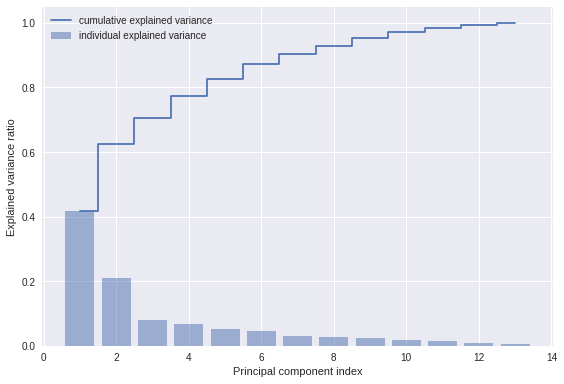

In [9]:
import matplotlib.pyplot as plt

# 分散説明率のグラフを作成
plt.bar(range(1, 14), var_exp, alpha=0.5, align="center", label="individual explained variance")

# 分散説明率の累積和の階段グラフを作成
plt.step(range(1, 14), cum_var_exp, where="mid", label="cumulative explained variance")

plt.ylabel("Explained variance ratio")
plt.xlabel("Principal component index")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 固有ベクトルから射影行列を生成し、データをより低い次元の部分空間に変換

In [10]:
# （固有値, 固有ベクトル）のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# （固有値, 固有ベクトル）のタプルを大きいものから順に並べ替え
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

最も大きい2つの固有値に対応する2つのベクトルを集める。それにより、このデータセットにおける分散の約60%を捉えることができる。<b>実務では、計算効率と分類器の性能のバランスを見ながら、主成分の個数を決定する。</b>

In [11]:
eigen_pairs

[(5.402090084713561,
  array([ 0.1556483 , -0.2452097 , -0.08150971, -0.24843062,  0.08521154,
          0.37015094,  0.42284281, -0.28503092,  0.31500479, -0.10345505,
          0.30414865,  0.38480179,  0.30407734])),
 (2.7197455514349334,
  array([-4.55389486e-01, -1.51397299e-01, -1.91805050e-01, -1.43576667e-02,
         -2.20873692e-01, -8.99536856e-02,  1.34977236e-02, -2.59228809e-04,
         -1.82436722e-01, -6.66506000e-01,  2.25350851e-01,  2.06153406e-01,
         -3.23804272e-01])),
 (1.038602931770949,
  array([-0.09454355, -0.04373965,  0.32840544,  0.42123488, -0.48187743,
          0.36729159,  0.25167326,  0.15680221,  0.24256368,  0.07028   ,
         -0.32470994,  0.18807011, -0.21033482])),
 (0.8619614958513491,
  array([ 0.07645229,  0.14350721,  0.55098939, -0.09154941, -0.07077057,
          0.08657322,  0.07619812,  0.46135571, -0.35442322, -0.23274609,
          0.29536748, -0.01653062,  0.4038932 ])),
 (0.6846625027259304,
  array([-0.32487714,  0.05385898, 

In [12]:
# 上位2つの固有ベクトルから13×2次元の射影行列Wを作成
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print("Matrix W:\n", w)

Matrix W:
 [[ 1.55648304e-01 -4.55389486e-01]
 [-2.45209699e-01 -1.51397299e-01]
 [-8.15097066e-02 -1.91805050e-01]
 [-2.48430624e-01 -1.43576667e-02]
 [ 8.52115427e-02 -2.20873692e-01]
 [ 3.70150944e-01 -8.99536856e-02]
 [ 4.22842806e-01  1.34977236e-02]
 [-2.85030920e-01 -2.59228809e-04]
 [ 3.15004789e-01 -1.82436722e-01]
 [-1.03455045e-01 -6.66506000e-01]
 [ 3.04148654e-01  2.25350851e-01]
 [ 3.84801787e-01  2.06153406e-01]
 [ 3.04077338e-01 -3.23804272e-01]]


行列の内積を計算することにより、124×13次元のトレーニングデータセット全体を2つの主成分に変換できる。

In [13]:
X_train_pca = X_train_std.dot(w)

## 変換後のデータセットを、2次元の散布図としてプロット

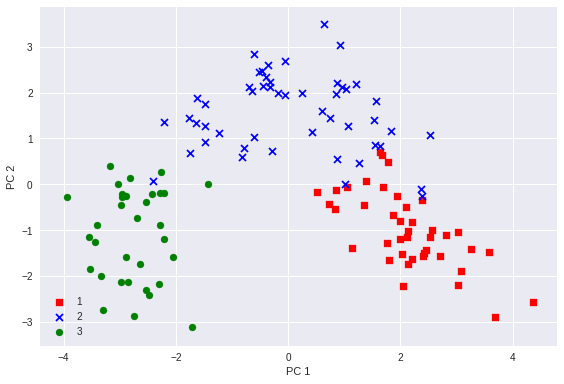

In [14]:
colors = ["r", "b", "g"]
markers = ["s", "x", "o"]

# 「クラスラベル」「点の色」「点の種類」の組み合わせからなるリストを生成してプロット
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)
  
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

# scikit-learnで主成分分析

## プロットの準備

In [15]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  # マーカーとカラーマップの準備
  markers = ("s", "x", "o", "^", "v")
  colors = ("red", "blue", "lightgreen", "gray", "cyan")
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # 決定領域のプロット
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
  
  # 各特徴量を1次元配列に変換して予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  
  # 予測結果を元のグリッドポイントのデータサイズに変換
  Z = Z.reshape(xx1.shape)
  
  # グリッドポイントの等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  
  # 軸の範囲の設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  # クラスごとにサンプルをプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.6,
                        c=cmap(idx),
                        edgecolor="black",
                        marker=markers[idx],
                        label=cl)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# 主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)

# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()

# トレーニングデータとテストデータでPCAを実行
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# トレーニングデータでロジスティック回帰を実行
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

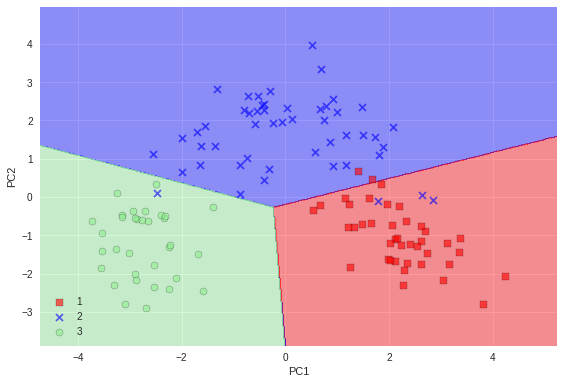

In [22]:
# 決定境界をプロット
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

## 変換後のテストデータセットでロジスティック回帰

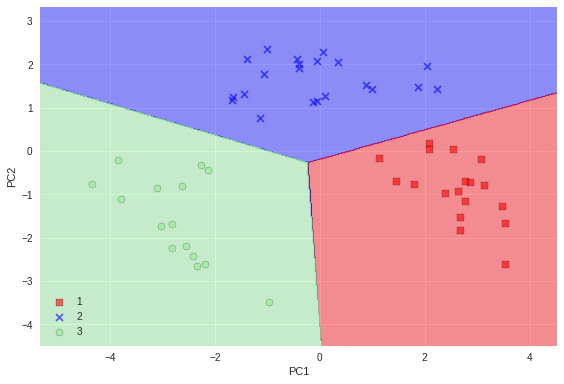

In [23]:
# 決定境界をプロット
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

## 全ての主成分の分散説明率

In [26]:
# NoneでPCAクラスを初期化
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)

# 分散説明率を計算
pca.explained_variance_ratio_

array([0.34877356, 0.19862434, 0.12085851, 0.07711475, 0.06583515,
       0.04897995, 0.04003769, 0.02346605, 0.02164302, 0.01795995,
       0.01616894, 0.01202903, 0.00850906])